In [2]:
import cv2
#import pytesseract
import matplotlib.pyplot as plt
from imutils import contours
import easyocr

In [3]:
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [4]:
def crop_image(image, t, b, l, r):
  h, w = image.shape[:2]
  pt = int(h * t / 100.0)
  pb = int(h * b / 100.0)
  pl = int(w * l / 100.0)
  pr = int(w * r / 100.0)

  return image[pt:h - pb, pl:w - r]

In [26]:
def size_cond(h, w):
    k = w / h
    const_min = 3.5 #4.571428571428571
    const_max = 4.7727272727272725
    return (k > const_min * 0.93) and (k < const_max * 1.07)

# Поиск и рисвание контуров

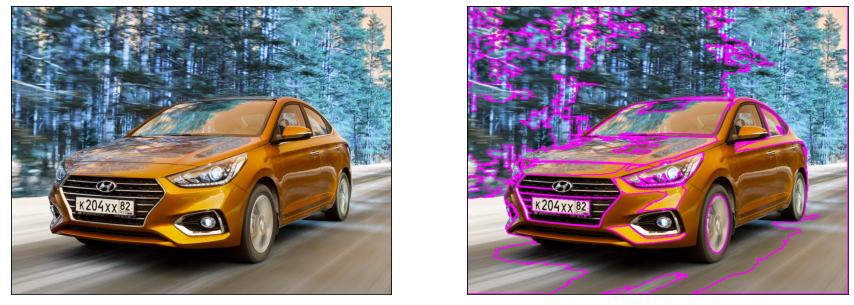

In [22]:
image = cv2.imread('auto/k204xx82.jpeg')
#image = cv2.imread('auto/k816ea163.jpg')
#image = cv2.imread('auto/b005bb777.jpg')
#image = cv2.imread('auto/x005ex777.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)[1]
#edges = cv2.Canny(gray, 30, 200)
cnts, new = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:15]

image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

plot_images(image, image_copy)

## Поиск контура номера

2.86784140969163
8.736842105263158
3.142857142857143


TypeError: Image data of dtype object cannot be converted to float

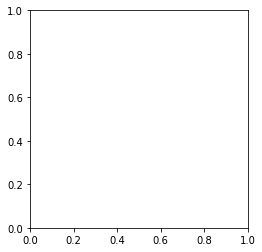

In [27]:
plate = None
k = 0.02 # для некоторых номеров нужно поставить 0.02 или 0.01
save = []
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, k * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        print(w / h)
        if size_cond(h, w):
            save = c
            plate = thresh[y:y+h, x:x+w]
            break
        
plt.imshow(plate, cmap='gray')
print(save)

In [94]:
reader = easyocr.Reader(['en'], gpu=False) # загрузка OCR движка

Using CPU. Note: This module is much faster with a GPU.


## Дополнительное преобразование изображения

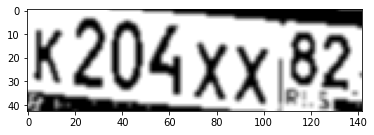

In [108]:
allow_chars = ['A', 'B', 'E', 'K', 'M', 'H', 'O', 'P', 'C', 'T', 'Y', 'X', '1','2','3','4','5','6','7','8','9','0']

tplate = cv2.GaussianBlur(plate, (3,3), 0)
tplate = crop_image(tplate, 7, 7, 5, 5)
plt.imshow(tplate, cmap='gray')

## Распознавание

In [109]:
result = reader.recognize(tplate, allowlist=allow_chars)
result[0][1]

'K2O4XX82'